In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
# Set Random Seed
seed = np.random.seed(123)
sns.set_theme(context = 'paper')

# <span style="color: blue;"> Credit Card Fraud Detection</span>

**Objective**

**i. Dataset**

**Project Pipeline**
- Import and understand the fraud data
- See if the data has any shortcomings like missing data or imbalance, and then fix them
- Train models on the data using K-Fold Cross Validation
- Evaluate the performance of the models using various metrics
- Rank the model based on their performance and visualize the results
    
**ii. Pre-processing**

**iii. Training models**

**iv. Evaluation**

## <span style="color: red;">Objective
### Credit Card Fraud 
- Credit card fraud is the unauthorized use of a credit card to make purchases or withdraw funds.
### Source 
- The dataset contains transactions made by credit cards in September 2013 by European cardholders, and also available in Kaggle.
### Objective
- to detect fraudulent credit card transactions or not based on synthetic features

## <span style="color: red;">i. Dataset
- It contains only numerical input variables which are the result of a PCA transformation. 
- There are a total of 31 features in the dataset.
    - `V1, V2, … V28` are the principal components obtained with PCA
    - `Time` contains the seconds elapsed between each transaction and the first transaction in the dataset.
    - `Amount` is the transaction Amount
    - Target: `Class` 1 in case of fraud and 0 otherwise.
### Load the dataset

In [2]:
df = pd.read_csv('creditcard.csv')
display(df.head())
print('Shape of the dataset:', df.shape)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Shape of the dataset: (284807, 31)


In [3]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [4]:
display(df.describe())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Checking for NaN presence

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
## Checking for NaN presence
df.isna().sum().max()

0

### Class Distribution 

In [7]:
class_counts = df['Class'].value_counts()
display(class_counts)

Class
0    284315
1       492
Name: count, dtype: int64

## <span style="color: red;">ii. Pre-processing
### <span style="color: blue;">Check for Duplicates

In [8]:
df.duplicated().sum()

1081

There are 1081 duplicated rows in the dataset. Duplicate rows can skew the analysis and the results of the model trainning, as they can introduce bias and potentially lead to overfitting.
Removing duplicates is generally a good practice in data preprocessing, especially in a sensitive task like fraud detection where accuracy is critical. So, I am gonna remove that.

In [9]:
## Remove the Duplicate Rows
df_new = df.drop_duplicates()
# Verify the number of rows after removing duplicates
print('Number of rows after removing duplicates:',df_new.shape[0])

Number of rows after removing duplicates: 283726


### <span style="color: blue;">Class Distribution (after)

In [10]:
class_counts = df_new['Class'].value_counts()
display(class_counts)

Class
0    283253
1       473
Name: count, dtype: int64

### Bar Plot showing the Class Distribution

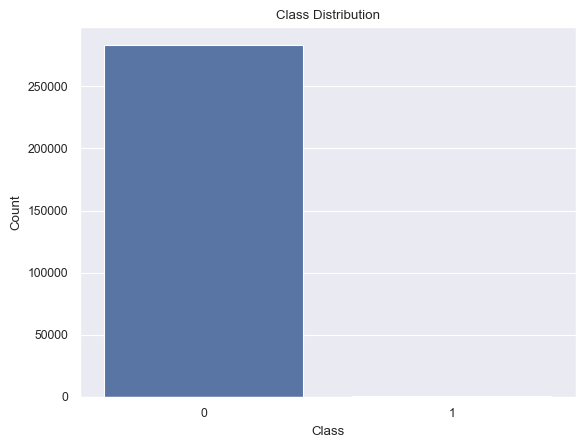

In [11]:
sns.barplot(x=class_counts.index, y=class_counts.values);
plt.title('Class Distribution');
plt.xlabel('Class');
plt.ylabel('Count');

### Pie Chart to show the class distribution

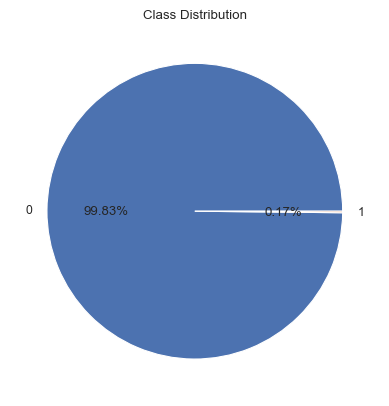

In [12]:
plt.pie(class_counts, labels=class_counts.index, autopct='%1.2f%%');
plt.title('Class Distribution');

As we can see, the dataset is very imbalanced as most of the transaction are **Non-Fraud**. Use this dataset for predictive models might cause a lot of errors because the models will tend to overfit since it gonna assume the most transactions are Non-Fraud

## <span style="color: blue;"> Feature Engineering  
`scaler`: https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#standardscaler    
### Plot the distribution of Transaction `Amount` and `Time`    

/var/folders/3v/hv8gygz544x36c5wqqmmn5c80000gn/T/ipykernel_3094/1464820140.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new['Amount'], ax=axes[0])
/var/folders/3v/hv8gygz544x36c5wqqmmn5c80000gn/T/ipykernel_3094/1464820140.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new['Time

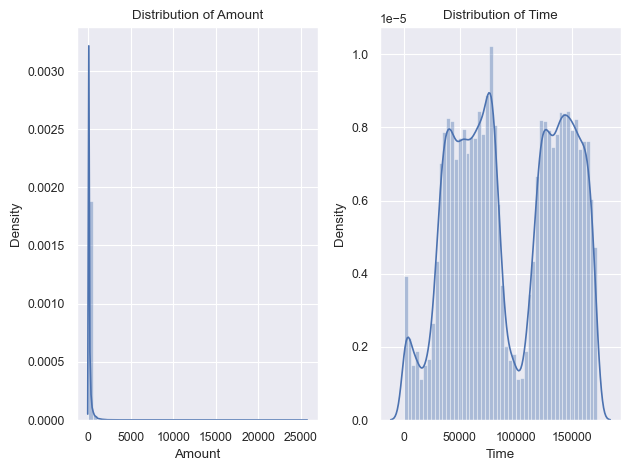

In [13]:
# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2)  # Adjust figsize as needed

# Plot the distribution of 'Amount' on the first subplot
sns.distplot(df_new['Amount'], ax=axes[0])
axes[0].set_title('Distribution of Amount')

# Plot the distribution of 'Time' on the second subplot
sns.distplot(df_new['Time'], ax=axes[1])
axes[1].set_title('Distribution of Time')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

### Scaling Transaction `Amount`
`Amount` is not normally distributed. So I either do `RobustScaler` or `Log Transformation`

Im choosing `Log Transformation` in this case as Applying a logarithmic transformation can help in reducing the skewness of the distribution. This can be particularly useful if your transaction amounts span several orders of magnitude.

/var/folders/3v/hv8gygz544x36c5wqqmmn5c80000gn/T/ipykernel_3094/1151910142.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_scaled['Amount_scaled'].values);


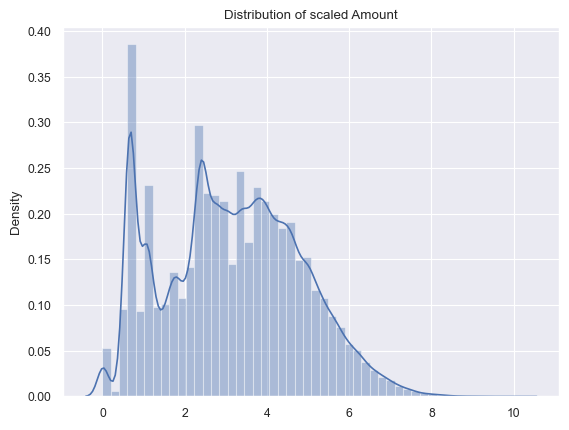

In [14]:
df_scaled = df_new.copy()

df_scaled['Amount_scaled'] = np.log1p(df_scaled['Amount'])  # log1p is used to avoid log(0)
sns.distplot(df_scaled['Amount_scaled'].values);
plt.title('Distribution of scaled Amount');

### Scaling Transaction `Time`
Transaction Time often represents the time elapsed since a reference point (e.g., the start of data collection). It's a continuous variable, and its distribution can vary significantly.
We can use `StandardScaler` or `MinMaxScaler`:
- `StandardScaler`: This scaler standardizes features by removing the mean and scaling to unit variance. It's useful if the transaction times are normally distributed.
- `MinMaxScaler`: This scaler scales features to a range, typically between 0 and 1. It's useful if the transaction times have a known range or if we want to normalize the time values.

Im choosing `StandardScaler` in this case as the `Time` is not really skewed.

/var/folders/3v/hv8gygz544x36c5wqqmmn5c80000gn/T/ipykernel_3094/2873081768.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_scaled['Time_scaled'].values);


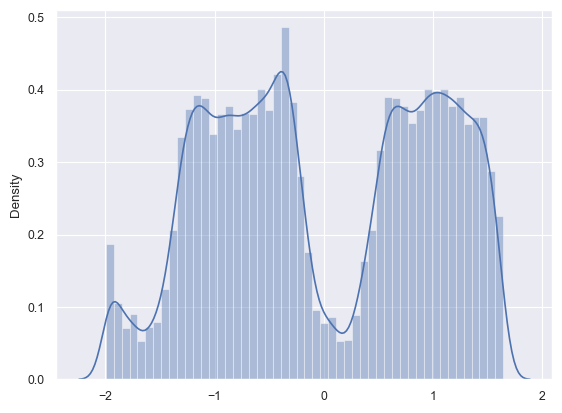

In [15]:
## StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled['Time_scaled'] = scaler.fit_transform(df_scaled[['Time']])

sns.distplot(df_scaled['Time_scaled'].values);

### Check the new scaled dataset

In [16]:
df_scaled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Amount_scaled,Time_scaled
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,5.014760,-1.996823
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,1.305626,-1.996823
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,5.939276,-1.996802
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,4.824306,-1.996802
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,4.262539,-1.996781


### Drop column `Time` and `Amount`

In [17]:
df_scaled.drop(['Time', 'Amount'], axis=1, inplace=True)
df_scaled.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Amount_scaled,Time_scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,5.014760,-1.996823
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,1.305626,-1.996823
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,5.939276,-1.996802
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,4.824306,-1.996802
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,4.262539,-1.996781


## <span style="color: blue;"> Dealing with Imbalanced dataset

**Split the data first**: Perform the train-test split before applying any resampling techniques. This ensures that your model's evaluation metrics are valid and that the model is tested on a truly unseen dataset.

**Resample only the training set**: Apply resampling techniques such as Random UnderSampling or OverSampling (e.g., SMOTE) only on the **training set**. This prevents data leakage, where information from the test set influences the training process, leading to overly optimistic performance estimates.

**Train and evaluate**: Train your model on the resampled training set and evaluate it on the original (unresampled) test set.
### Split the data    

In [29]:
from sklearn.model_selection import train_test_split
X = df_scaled.drop('Class', axis=1)
y = df_scaled['Class']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,
                                                   random_state=seed, stratify=y)

### 1. Apply Random `UnderSampling` to the training data

In [30]:
from imblearn.under_sampling import RandomUnderSampler
under_sampler = RandomUnderSampler(random_state=seed)
X_train_under, y_train_under = under_sampler.fit_resample(X_train, y_train)

## Check for Equally Distributing
print('Distribution of the Classes after Apply Random UnderSampling:')
display(y_train_under.value_counts())

Distribution of the Classes after Apply Random UnderSampling:


Class
0    331
1    331
Name: count, dtype: int64

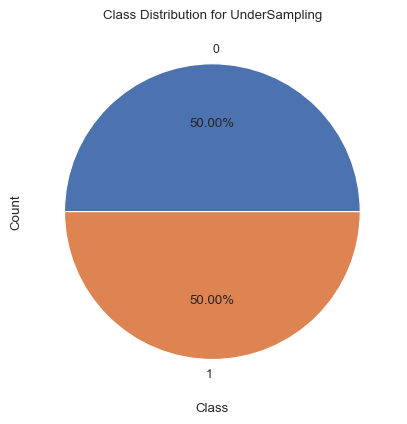

In [31]:
plt.pie(y_train_under.value_counts(), 
        labels=y_train_under.value_counts().index, 
        autopct='%1.2f%%');
plt.title('Class Distribution for UnderSampling');
plt.xlabel('Class');
plt.ylabel('Count');

### 2. Apply `Oversampling` using `SMOTE` to the trainning data

In [32]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=seed)
X_train_SMOTE, y_train_SMOTE =smote.fit_resample(X_train, y_train)

## Check for Equally Distributing
print('Distribution of the Classes after Apply SMOTE:')
display(y_train_SMOTE.value_counts())

Distribution of the Classes after Apply SMOTE:


Class
0    198277
1    198277
Name: count, dtype: int64

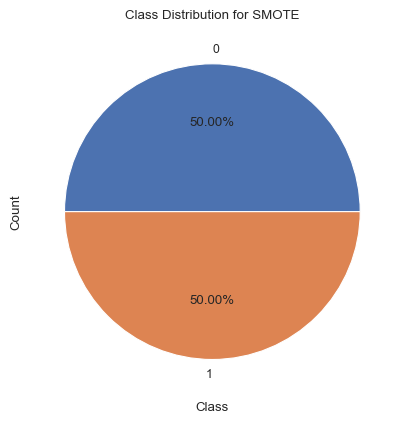

In [40]:
plt.pie(y_train_SMOTE.value_counts(), 
        labels=y_train_SMOTE.value_counts().index, 
        autopct='%1.2f%%');
plt.title('Class Distribution for SMOTE');
plt.xlabel('Class');
plt.ylabel('Count');

### 3. Apply combine resampling to trainning data
Use combination of both over-sampling the minority class and under-sampling the majority class: `SMOTE + Tomek` or `SMOTE + Edited Nearest Neighbors (ENN)`

These combinations aim to balance the dataset while minimizing the risk of introducing noise and ensuring that the synthetic samples are useful.
- `SMOTE` for over-sampling the minority class.
- `TomekLinks` or `EditedNearestNeighbours` for cleaning the dataset by removing ambiguous samples.
    - `TomekLinks`: Identifies and removes samples that are closest to the decision boundary (ambiguous samples), effectively performing under-sampling.
    - `EditedNearestNeighbours (ENN)`: Removes samples that are misclassified by their k-nearest neighbors, which helps clean the dataset further.
### 3.1. Apply SMOTE + TomekLinks
TomekLinks is simpler and faster, and it focuses on removing borderline cases, which can reduce the overlap between classes.

In [34]:
from imblearn.combine import SMOTETomek

smote_tomek = SMOTETomek(random_state=seed)
X_train_smote_tomek, y_train_smote_tomek = smote_tomek.fit_resample(X_train, y_train)

## Check for Equally Distributing
print('Distribution of the Classes after Apply SMOTE + Tomek:')
display(y_train_smote_tomek.value_counts())

Distribution of the Classes after Apply SMOTE + Tomek:


Class
0    198277
1    198277
Name: count, dtype: int64

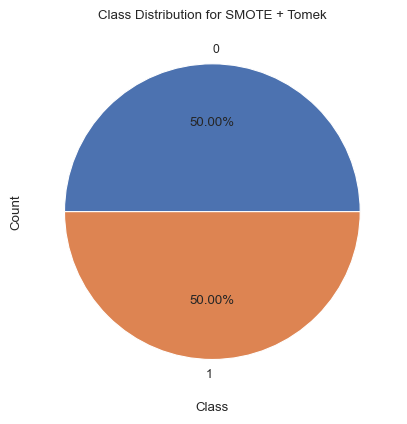

In [39]:
plt.pie(y_train_smote_tomek.value_counts(), 
        labels=y_train_smote_tomek.value_counts().index, 
        autopct='%1.2f%%');
plt.title('Class Distribution for SMOTE + Tomek');
plt.xlabel('Class');
plt.ylabel('Count');

### 3.2 Apply SMOTE + ENN
ENN is more aggressive and removes more samples, which can be useful if you have a lot of noise but might lead to more information loss.

In [36]:
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=seed)
X_train_smote_enn, y_train_smote_enn = smote_enn.fit_resample(X_train, y_train)

## Check for Equally Distributing
print('Distribution of the Classes after Apply SMOTE + ENN:')
display(y_train_smote_enn.value_counts())

Distribution of the Classes after Apply SMOTE + ENN:


Class
1    198277
0    197986
Name: count, dtype: int64

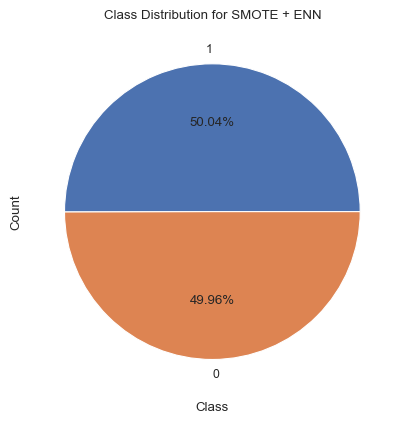

In [38]:
plt.pie(y_train_smote_enn.value_counts(), 
        labels=y_train_smote_enn.value_counts().index, 
        autopct='%1.2f%%');
plt.title('Class Distribution for SMOTE + ENN');
plt.xlabel('Class');
plt.ylabel('Count');

## <span style="color: blue;"> Exploratory Data Analysis (EDA)
### Correlation Matrix (Original dataset)    

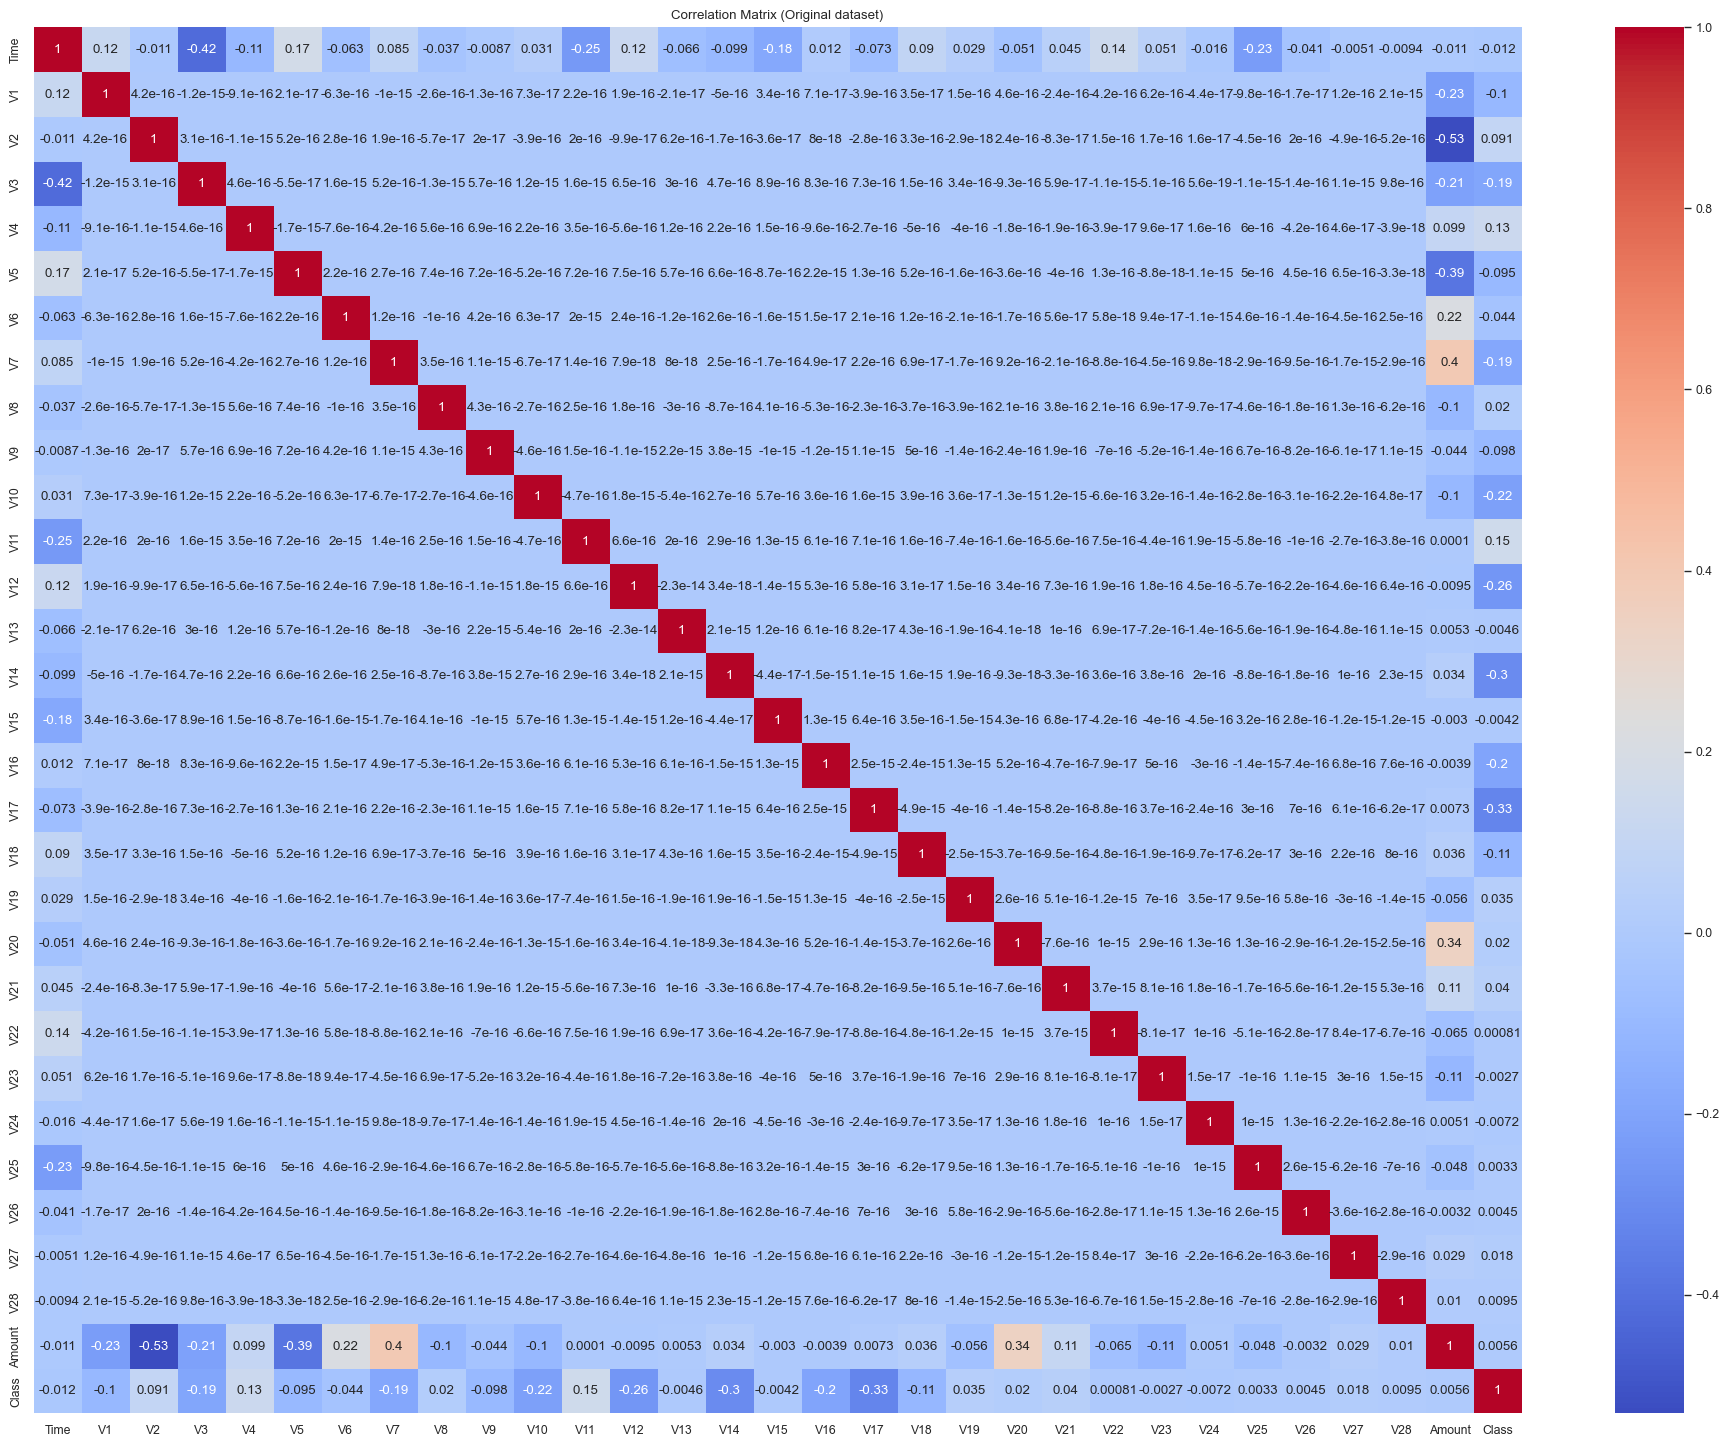

In [43]:
## Checking for the correlation
corr = df.corr()
# Checking the correlation in heatmap
plt.figure(figsize=(24,18))
sns.heatmap(corr, cmap='coolwarm', annot=True);
plt.title('Correlation Matrix (Original dataset)');

### Correlation Matrix (after `scaled` and `Undersampling`)

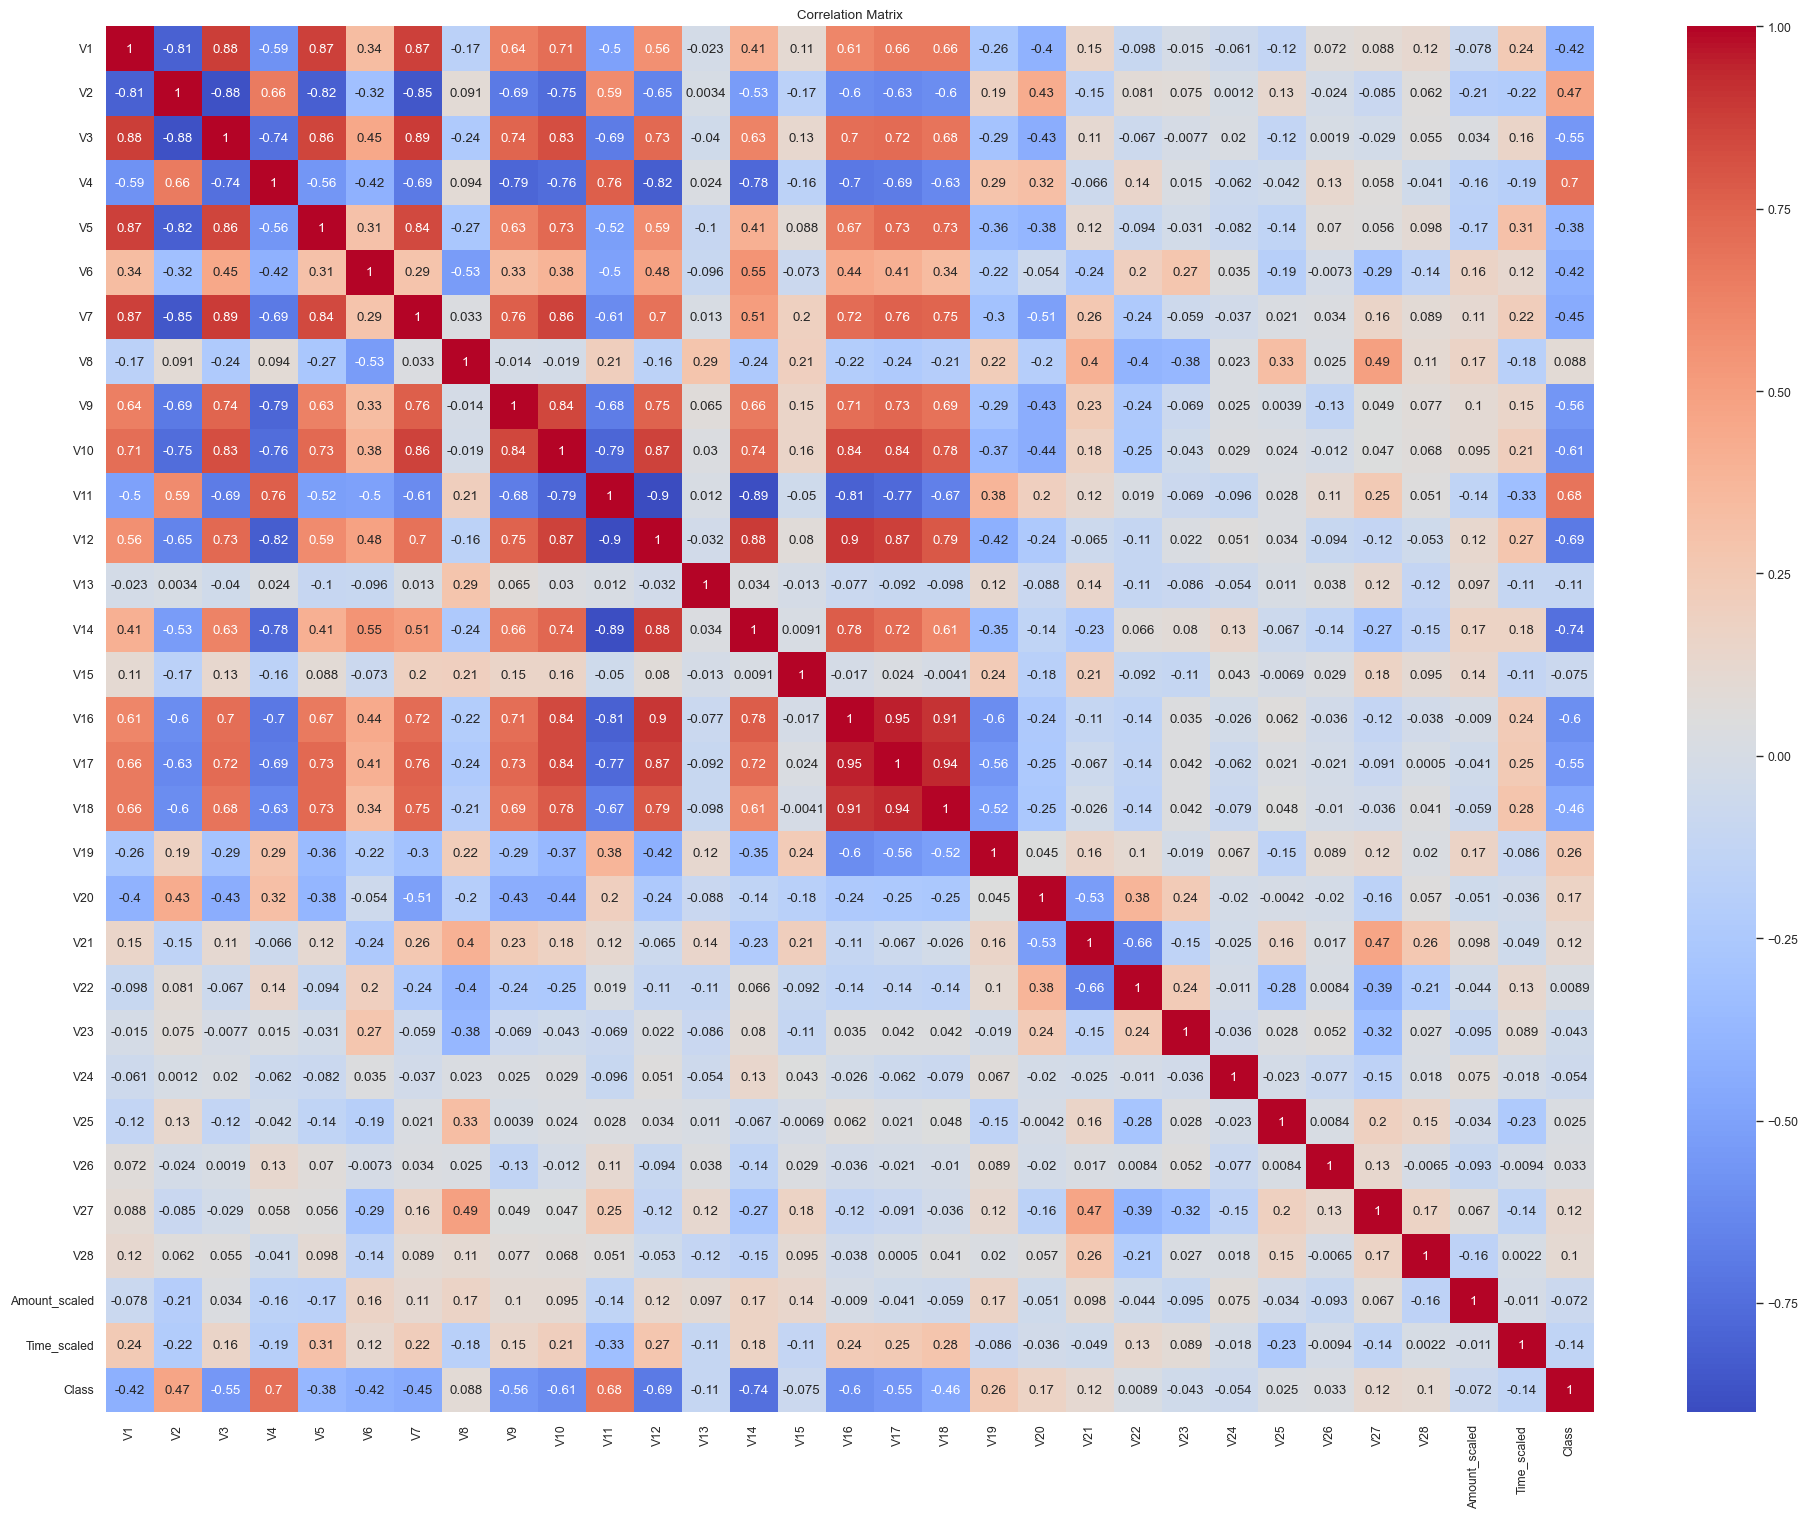

In [49]:
# Convert y_train_under to a DataFrame and name the column
y_train_under_df = pd.DataFrame(y_train_under, columns=['Class'])

# Combine X_train_under with y_train_under
df_train_under = pd.concat([X_train_under.reset_index(drop=True), 
                            y_train_under_df.reset_index(drop=True)], axis=1)
# Compute the correlation matrix
corr = df_train_under.corr()
# Checking the correlation in heatmap
plt.figure(figsize=(24,18))
sns.heatmap(corr, cmap='coolwarm', annot=True);
plt.title('Correlation Matrix');

## <span style="color: blue;"> Anomaly Detection
Anomaly detection refers to the process of identifying data points, events, or observations that are significantly different from the majority of the data. These anomalies can represent significant deviations from normal behavior and can indicate various phenomena such as errors, fraud, or novel insights.

#### Techniques for Anomaly Detection
1. **Statistical Methods**: Z-Score, Grubbs' Test, Chi-Square Test
2. **Machine Learning Methods**:
    - Supervised Learning: Random Forest, SVM for anomaly detection.
    - Unsupervised Learning (Clustering Algorithms): Identify anomalies based on clustering techniques. K-Means, DBSCAN, Isolation Forest.
    - Semi-Supervised Learning (Anomaly Detection Models): Use models trained only on normal data. One-Class SVM, Autoencoders.
3. **Distance-Based Methods:**
    - k-Nearest Neighbors (k-NN): Measures how isolated a data point is from others.
    - Local Outlier Factor (LOF): Identifies anomalies based on the local density of data points.
4. **Statistical Modeling Methods:** Gaussian Mixture Models: Models the data distribution and detects anomalies based on likelihood.

# <span style="color: red;">---------------------------------------
# <span style="color: red;">---------------------------------------
# <span style="color: red;">---------------------------------------   
### Plotting the distribution of 'Class' for each variable
- It helps us to understand whether the skewness in the data

In [18]:
"""
# Accumulating all the column names under one variable
cols = list(X.columns.values)

# Plot the histogram of a variable from the dataset to see the skewness
normal_records = df2.Class == 0
fraud_records = df2.Class == 1

plt.figure(figsize=(20,60))
for n, col in enumerate(cols):
    plt.subplot(10,3,n+1)
    sns.histplot(X[col][normal_records], color='green', kde=True, stat='density', label='Normal')
    sns.histplot(X[col][fraud_records], color='red', kde=True, stat='density', label='Fraud')
    plt.title(col, fontsize=17)
plt.show()
"""

"\n# Accumulating all the column names under one variable\ncols = list(X.columns.values)\n\n# Plot the histogram of a variable from the dataset to see the skewness\nnormal_records = df2.Class == 0\nfraud_records = df2.Class == 1\n\nplt.figure(figsize=(20,60))\nfor n, col in enumerate(cols):\n    plt.subplot(10,3,n+1)\n    sns.histplot(X[col][normal_records], color='green', kde=True, stat='density', label='Normal')\n    sns.histplot(X[col][fraud_records], color='red', kde=True, stat='density', label='Fraud')\n    plt.title(col, fontsize=17)\nplt.show()\n"

## Model Building
- Confusion Matrix
- Classification Report: Precision, Recall, F1 Score, etc.
- Area Under the Curve (AUC) of Receiver Operating Characteristic (ROC)
    - the higher AUC, the better the performanace of the model at distinguishing between the positive and negative classes.

https://scikit-learn.org/stable/

In [19]:
# Create a dataframe to store results
df_Results = pd.DataFrame(columns=['Methodology', 'Model', 'roc_value', 'threshold'])

### Confusion Matrix

In [20]:
from sklearn.metrics import confusion_matrix
# Create a common function to plot 'Confusion Matrix'
def Plot_Confusion_Matrix(y_test, pred_test):
    cm = confusion_matrix(y_test, pred_test)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Accent)
    categoryNames = ['Non-Fraudalent', 'Fraudalent']
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    ticks = np.arange(len(categoryNames))
    plt.xticks(ticks, categoryNames, rotation=45)
    plt.yticks(ticks, categoryNames)
    s = [['TN', 'FP'], ['FN', 'TP']]
    # print the value
    for i in range(2): 
        for j in range(2):
            plt.text(j,o, str(s[i][j])+' = '+str(cm[i][j]),frontsize=12)
    plt.show()

### 1. Logistic Regression
- Create a common function to fit and predict on a Logistic Regression model for both: `L1` and `L2`

In [21]:
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

def LogisticModels(df_Results, Methodology, X_train, y_train, X_test, y_test):
    # K-Fold cross-validator
    num_C = list(np.power(10.0, np.arange(-10,10)))
    cv_num = KFold(n_splits=10, shuffle=True, random_state=seed)
    ## L2
    searchCV_L2 = linear_model.LogisticRegressionCV(
            Cs= num_C,
            penalty= 'l2',
            scoring= 'roc_auc',
            cv= cv_num,
            random_state=seed,
            max_iter=10000,
            fit_intercept=True,
            solver='newton-cg',
            tol=10)
    ## L1
    searchCV_L1 = linear_model.LogisticRegressionCV(
            Cs= num_C,
            penalty= 'l1',
            scoring= 'roc_auc',
            cv= cv_num,
            random_state=seed,
            max_iter=10000,
            fit_intercept=True,
            solver='newton-cg',
            tol=10)
    # Fit the models
    searchCV_L2.fit(X_train, y_train) # L2
    searchCV_L1.fit(X_train, y_train) # L1
    
    # Max AUC_ROC
    print('Max AUC_ROC for L2:', searchCV_L2.scores_[1].mean(axis=0).max())
    print('Max AUC_ROC for L1:', searchCV_L1.scores_[1].mean(axis=0).max())
    
    # Parameters for L2 Regularization
    print('\nParameters for L2 Regularization:')
    print(searchCV_L2.coef_)
    print(searchCV_L2.intercept_)
    print(searchCV_L2.scores_)
    # Parameters for L1 Regularization
    print('\nParameters for L1 Regularization:')
    print(searchCV_L1.coef_)
    print(searchCV_L1.intercept_)
    print(searchCV_L1.scores_)
    
    # Predicted values
    y_pred_L2 = searchCV_L2.predict(X_test)
    y_pred_L1 = searchCV_L1.predict(X_test)
    
    # Predicted Probabilities
    y_pred_prob_L2 = searchCV_L2.predict_proba(X_test)[:,1]
    y_pred_prob_L1 = searchCV_L1.predict_proba(X_test)[:,1]
    
    # Accuracy of L2 and L1 models
    Accuracy_L2 = metrics.accuracy_score(y_pred=y_pred_L2, y_true=y_test)
    ## L2
    print('\nAccuracy of Logistic model with L2 Regularization: {0}'.format(Accuracy_L2))
    print('Confusion Matrix') 
    Plot_Confusion_Matrix(y_test, y_pred_L2)
    
    print('Classification Report')
    print(classification_report(y_test, y_pred_L2))
    
    ## L1
    Accuracy_L1 = metrics.accuracy_score(y_pred=y_pred_L1, y_true=y_test)
    print('\nAccuracy of Logistic model with L1 Regularization: {0}'.format(Accuracy_L1))
    print('Confusion Matrix') 
    Plot_Confusion_Matrix(y_test, y_pred_L1)
    
    print('Classification Report')
    print(classification_report(y_test, y_pred_L1))
    
    # L2 ROC Value -------------------------------------------
    L2_ROC_value = roc_auc_score(y_test, y_pred_prob_L2)
    print(f'\nL2 ROC value: {L2_ROC_value}')
    FPR, TPR, thresholds = metrics.roc_curve(y_test, y_pred_prob_L2)
    threshold = thresholds[np.argmax(TPR-FPR)]
    print(f'L2 threshold: {threshold}')
    
    ROC_AUC = metrics.auc(FPR, TPR)
    print(f'ROC for the test dataset {ROC_AUC}')
    plt.plot(FPR, TPR, label='Test, AUC='+str(ROC_AUC))
    plt.legend(loc=4)
    plt.show()
    
    df_Results = df_Results.append(pd.DataFrame({'Methodology':Methodology,
                                                'Model':'Logistic Regression with L2 Regularization',
                                                'Accuracy':Accuracy_L2,
                                                'roc_value':L2_ROC_value,
                                                'threshold':threshold}))
    
    # L1 ROC Value ---------------------------------------------
    L1_ROC_value = roc_auc_score(y_test, y_pred_prob_L1)
    print(f'\nL1 ROC value: {L1_ROC_value}')
    FPR, TPR, thresholds = metrics.roc_curve(y_test, y_pred_prob_L1)
    threshold = thresholds[np.argmax(TPR-FPR)]
    print(f'L1 threshold: {threshold}')
    
    ROC_AUC = metrics.auc(FPR, TPR)
    print(f'ROC for the test dataset {ROC_AUC}')
    plt.plot(FPR, TPR, label='Test, AUC='+str(ROC_AUC))
    plt.legend(loc=4)
    plt.show()
    
    df_Results = df_Results.append(pd.DataFrame({'Methodology':Methodology,
                                                'Model':'Logistic Regression with L1 Regularization',
                                                'Accuracy':Accuracy_L1,
                                                'roc_value':L1_ROC_value,
                                                'threshold':threshold}))
    return df_Results

### 2. K-Nearest Neighbour (KNN)
- The number of nearest neighbours to a new unknown variable that has to be predicted or classified is denoted by the symbol 'K'.

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

def KNN_Models(df_Results, Methodology, X_train, y_train, X_test, y_test):
    # create KNN model and fit the model with training dataset
    knn = KNeighborsClassifier(n_neighbors=5, n_jobs=16)
    knn.fit(X_train, y_test)
    score = knn.score(X_test, y_test)
    print('Model score:')
    print(score)
    
    # Accuracy ---------------------------------------
    y_pred = knn.predict(X_test)
    KNN_Accuracy = metrics.accuracy_score(y_pred=y_pred, y_true=y_test)
    print('Confusion Matrix')
    Plot_Confusion_Matrix(y_test, y_pred)
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    
    knn_probs = knn.predict_proba(X_test)[:,1]
    
    # Calculate ROC AUC ---------------------------------
    KNN_roc_value = roc_auc_score(y_test, knn_probs)
    print('KNN roc_value:', KNN_roc_value)
    FPR, TPR, thresholds = metrics.roc_curve(y_test, knn_probs)
    threshold = thresholds[np.argmax(TPR - FPR)]
    print('KNN threshold:', threshold)
    
    roc_auc = metrics.auc(FPR, TPR)
    print('ROC for the test dataset:','{:.1%}'.format(roc_auc))
    plt.plot(FPR, TPR, label='Test, AUC='+str(roc_auc))
    plt.legend(loc=4)
    plt.show()
    
    df_Results = df_Results.append(pd.DataFrame({'Methodology':Methodology,
                                                'Model':'KNN',
                                                'Accuracy':score,
                                                'roc_value':KNN_roc_value,
                                                'threshold':threshold}))
    return df_Results

### 3. Decision Tree Classifier
- Gini
- Entropy

In [23]:
from sklearn.tree import DecisionTreeClassifier

def TreeModels(df_Results, Methodology, X_train, y_train, X_test, y_test):
    # Evaluate Decision Tree with 'gini' and 'entropy'
    criteria = ['gini', 'entropy']
    scores = {}
    
    for c in criteria:
        dt = DecisionTreeClassifier(criterion=c, random_state=seed)
        dt.fit(X_train, y_train)
        y_pred = dt.predict(X_test)
        test_score = dt.score(X_test, y_test)
        tree_preds = dt.predict_proba(X_test)[:,1]
        tree_ROC_value = roc_auc_score(y_test, tree_preds)
        scores = test_score
        print(c + 'score: {0}' .format(test_score))
        ## Confusion Matrix
        print('\nConfusion Matrix:')
        Plot_Confusion_Matrix(y_test, y_pred)
        ## Classification Report
        print('\nClassification Report:')
        print(classification_report(y_test, y_pred))
        print(c + 'tree_ROC_value: {0}' .format(tree_ROC_value))
        FPR, TPR, thresholds = metrics.roc_curve(y_test, tree_preds)
        threshold = thresholds[np.argmax(TPR-FPR)]
        print('Tree threshold: {0}' .format(threshold))
        roc_auc = metrics.auc(FPR, TPR)
        print('ROC for the test dataset', '{:.1%}'.format(roc_auc))
        plt.plot(FPR, TPR, label='Test, auc='+str(roc_auc))
        plt.legend(loc=4)
        plt.show()
        
        df_Results = df_Results.append(pd.DataFrame({'Methodology':Methodology,
                                                'Model':'Tree Model with {0} criteria'.format(c),
                                                'Accuracy':test_score,
                                                'roc_value':tree_ROC_value,
                                                'threshold':threshold}))
        return df_Results

### 4. Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier
def RandomForest_Models(df_Results, Methodology, X_train, y_train, X_test, y_test):
    # Evaluate Random Forest models 
    # Create the model with 100 trees
    RF_model = RandomForestClassifier(n_estimators=100,
                                     bootstrap=True,
                                     max_features='sqrt',
                                     random_state=seed)
    # Fit on training data
    RF_model.fit(X_train, y_train)
    RF_test_score = RF_model.score(X_test, y_test) 
    RF_model.predict(X_test)
    
    print('Model Accuracy :', RF_test_score)
    
    # Actual class prediction
    rf_predictions = RF_model.predict(X_test)
    # Confusion Matrix
    print('Confusion Matrix')
    Plot_Confusion_Matrix(y_test, rf_predictions)
    # Classification Report
    print('Classification Report')
    print(classification_report(y_test, rf_predictions))
    
    # Probabilities for each class
    rf_probs = RF_model.predict_proba(X_test)[:,1]
    # Calculate ROC AUC
    ROC_value = roc_auc_score(y_test, rf_probs)
    
    print(f'Random Forest roc_value: {ROC_value}')
    FPR, TPR, thresholds = metrics.roc_curve(y_test, rf_probs)
    threshold = thresholds[np.argmax(TPR-FPR)]
    print(f'Random Forest threshold: {threshold}')
    roc_auc = metrics.auc(FPR, TPR)
    print('ROC for the test dataset', '{:.1%}'.format(roc_auc))
    plt.plot(FPR, TPR, label='Test, auc='+str(roc_auc))
    plt.legend(loc=4)
    plt.show()
        
    df_Results = df_Results.append(pd.DataFrame({'Methodology':Methodology,
                                                'Model':'Random Forest',
                                                'Accuracy':RF_test_score,
                                                'roc_value':ROC_value,
                                                'threshold':threshold}, 
                                                index=[0]), ignore_index=True)
    return df_Results

### 5. XGBoost

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
def XGBoost(df_Results, Methodology, X_train, y_train, X_test, y_test):
    # Evaluate XGBoost model
    XGBoost_model = GradientBoostingClassifier(random_state=seed)
    XGBoost_model.fit(X_train, y_train)
    y_pred = XGBoost_model.predict(X_test)
    # Model Accuracy
    XGB_test_score = XGBoost_model.score(X_test, y_test)
    print('Model Accuracy: {0}'.format(XGB_test_score))
    # Confusion Matrix
    print('Confusion Matrix')
    Plot_Confusion_Matrix(y_test, y_pred)
    # Classification Report
    print('Classification Report')
    print(classification_report(y_test, y_pred))
    
    # Probabilities for each class
    XGB_probs = XGBoost_model.predict_proba(X_test)[:, 1]
    # Calculate ROC AUC
    XGB_roc_value = roc_auc_score(y_test, XGB_probs)
    print('XGBoosting roc_value: {0}'.format(XGB_roc_value))
    FPR, TPR, thresholds = metrics.roc_curve(y_test, XGB_probs)
    threshold = thresholds[np.argmax(TPR-FPR)]
    print('XGBoost threshold: {0}'.format(threshold))
    roc_auc = metrics.auc(FPR, TPR)
    print('ROC for the test dataset', '{:.1%}'.format(roc_auc))
    plt.plot(FPR, TPR, label='Test, auc='+str(roc_auc))
    plt.legend(loc=4)
    plt.show()
        
    df_Results = df_Results.append(pd.DataFrame({'Methodology':Methodology,
                                                'Model':'XGBoost',
                                                'Accuracy':XGB_test_score,
                                                'roc_value':XGB_roc_value,
                                                'threshold':threshold}, 
                                                index=[0]), ignore_index=True)
    return df_Results

### 6. Support Vector Machine (SVM)
- Plot each data item as a point in n-dimensional space (where n is a number of features we have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiates the two classes very well.


In [26]:
from sklearn.svm import SVC
def SVM_Models(df_Results, Methodology, X_train, y_train, X_test, y_test):
    # Evaluate SVM model with sigmoid kernel model
    clf = SVC(kernel='sigmoid', random_state=deed)
    clf.fit(X_train, y_train)
    y_pred_SVM = clf.predict(X_test)
    # Accuracy score
    SVM_Score = accuracy_score(y_test, y_pred_SVM)
    print('Accuracy Score: {0}'.format(SVM_Score))
    # Confusion Matrix
    print('Confusion Matrix')
    Plot_Confusion_Matrix(y_test, y_pred_SVM)
    # Classification Report
    print('Classification Report')
    print(classification_report(y_test, y_pred_SVM))
    
    # Run classifier
    classifier = SVC(kernel='sigmoid', probability=True)
    SVM_probs = classifier.fit(X_train, y_train).predict_proba(X_test)[:,1]
    
    # Calculate roc auc
    roc_value = roc_auc_score(y_test, SVM_probs)
    
    print('SVM roc_value: {0}'.format(roc_value))
    FPR, TPR, thresholds = metrics.roc_curve(y_test, SVM_probs)
    threshold = thresholds[np.argmax(TPR-FPR)]
    print('SVM threshold: {0}'.format(threshold))
    roc_auc = metrics.auc(FPR, TPR)
    print('ROC for the test dataset', '{:.1%}'.format(roc_auc))
    plt.plot(FPR, TPR, label='Test, auc='+str(roc_auc))
    plt.legend(loc=4)
    plt.show()
        
    df_Results = df_Results.append(pd.DataFrame({'Methodology':Methodology,
                                                'Model':'SVM',
                                                'Accuracy':SVM_Score,
                                                'roc_value':roc_value,
                                                'threshold':threshold}, 
                                                index=[0]), ignore_index=True)
    return df_Results

Build different models on the imbalanced dataset and see the result

## Perform Cross Validation with `RepeatedKFold`

In [27]:
# Perform RepeatedKFold and check the results
from sklearn.model_selection import RepeatedKFold
rKF = RepeatedKFold(n_splits=5,
                   n_repeats=10,
                   random_state=None)
# X is the feature set and y is the target
for train_index, test_index in rKF.split(X,y):
    print('TRAIN:', train_index, 'TEST:', test_index)
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

NameError: name 'X' is not defined

In [ ]:
import time

## Run Logistic Regression with L1 and L2 Regularisation
print('Logistic Regression with L1 and L2 Regularisation')
start_time = time.time()
df_Results = LogisticModels(df_Results, 'RepeatedKFold Cross Validation',
                           X_train_cv, y_train_cv, X_test_cv, y_test_cv)
print('Time Taken by Model:--- %s seconds ---'%(time.time() - start_time))
print('-'*60)